# Heart Disease Dataset and Its Significance

The study of heart health stands as a primary focus among researchers across various fields. Heart health ranks as a foremost concern because people have neglected their lifestyle behaviors while their way of life changes dramatically.

Research on heart disease has been ongoing for several decades even though modern lifestyle trends have worsened the disease risks. The scientists behind the original dataset included Robert Detrano together with Andras Jánosi and William Steinbrunn and Matthias Pfisterer along with additional contributors during their work in 1988. The dataset became part of the UCI Machine Learning Repository on June 30, 1988.

### **Dataset Source**

The dataset was compiled from four medical institutions:

- **Cleveland Clinic Foundation (USA)**
- **Hungarian Institute of Cardiology (Budapest, Hungary)**
- **University Hospital (Zurich, Switzerland)**
- **VA Medical Center (Long Beach, USA)**

For this task, I am using a **Kaggle dataset**, which is sourced from the original UCI dataset:  
[Link to dataset](https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset)

### **Alignment with UNSDG 3: Good Health and Well-being**

The chosen dataset aligns with **UN Sustainable Development Goal 3 (SDG 3: Good Health and Well-being)**, which aims to **ensure healthy lives and promote well-being for all**.

# **Using the Dataset for Regression Task**

### **Target Variable: Resting Blood Pressure**

In this regression task, the goal is to predict **resting blood pressure** based on other medical attributes. **Resting blood pressure (trestbps)** is a critical factor in cardiovascular health, and understanding its dependencies can help in early diagnosis and treatment.

### **Research Questions**

1. Which external variables specifically affect a person's resting blood pressure?
2. Which variables among age along with cholesterol levels and heart rate affect blood pressure the most?
3. Does BMI correlate linearly with resting blood pressure measurements?
4. Can prediction models based on patient attributes successfully determine resting blood pressure measurements?
5. Can ECG data that reflects stress show any pattern connection to blood pressure values?


# Exploratory Data Analysis and Data Understanding: Task 1

In [1]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns

In [2]:
data = pd.read_csv("heart.csv")

In [3]:
data.shape

(1025, 14)

The shape of the dataframe is `df.shape → (1025, 14)`.

- **Rows:** 1025
- **Columns:** 14

In [4]:
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


**The dataset consists of the following columns:**

- `age`
- `sex`
- `cp`
- `trestbps`
- `chol`
- `fbs`
- `restecg`
- `thalach`
- `exang`
- `oldpeak`
- `slope`
- `ca`
- `thal`
- `target`

#### Observations

- The dataset is purely numerical.
- There are no string-based categorical features.
- Possible data types: **integers (`int`), floating-point (`float`), or possibly encoded categorical data**.


In [5]:
# confirming data types of each attributes
data.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [6]:
data.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

- **Encoded Categorical Variables** ⇒ `sex`, `cp`, `fbs`, `restecg`, `exang`, `slope`, `ca`, `thal`, `target`
- **Non-Encoded Numerical Variables** ⇒ `age`, `trestbps`, `chol`, `thalach`, `oldpeak`

In [7]:
print("\nSome statistical information of Non-encoded Numerical Variables:\n")

data[["age", "trestbps", "chol", "thalach", "oldpeak"]].describe()


Some statistical information of Non-encoded Numerical Variables:



,age,trestbps,chol,thalach,oldpeak
count,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000
mean,54.434146,131.611707,246.00000,149.114146,1.071512
std,9.072290,17.516718,51.59251,23.005724,1.175053
min,29.000000,94.000000,126.00000,71.000000,0.000000
25%,48.000000,120.000000,211.00000,132.000000,0.000000
50%,56.000000,130.000000,240.00000,152.000000,0.800000
75%,61.000000,140.000000,275.00000,166.000000,1.800000
max,77.000000,200.000000,564.00000,202.000000,6.200000


#### **Age**

- **Mean (54.43) & Median (56)** → Slightly left-skewed distribution.
- **Range: 29 - 77** → Covers a broad adult age group.
- **IQR (48 - 61)** → Most people in the dataset are between **48 to 61 years old**.
- No extreme outliers observed.

#### **Resting Blood Pressure (trestbps)**

- **Mean (131.61) & Median (130)** → Fairly symmetric distribution.
- **Range: 94 - 200** → Minimum is reasonable, but **200 seems high**.
- **IQR (120 - 140)** → Most values are within a normal range.
- Possible **outliers** above **200**.

#### **Cholesterol (chol)**

- **Mean (246.0) & Median (240)** → Normal distribution.
- **Range: 94 - 564** →
  - **Minimum 94** is low for cholesterol.
  - **Max 564 is quite high**, potential outlier.
- **IQR (211 - 275)** → Most people have cholesterol between these values.

#### **Maximum Heart Rate (thalach)**

- **Mean (149.11) & Median (152)** → Slightly left-skewed.
- **Range: 71 - 202** →
  - **Minimum 71 is quite low**, indicating individuals with very low max heart rate.
  - **Max 202 is reasonable.**
- **IQR (132 - 166)** → Most values fall in this range.
- No extreme outliers.

#### **Oldpeak (ST Depression Induced by Exercise)**

- **Mean (1.07) & Median (0.8)** → Right-skewed (since mean > median).
- **Range: 0.0 - 6.2** →
  - Many **zero values**, indicating no ST depression in some cases.
  - **6.2 is quite high**, suggesting outliers.
- **IQR (0.0 - 1.8)** → Most values are **below 1.8**.

### **Overall Observations**

**No missing values** in any column.  
**Most attributes are normally distributed** except **Oldpeak**, which is slightly skewed.  
**Possible outliers** in **cholesterol, thalach, and oldpeak**.


In [8]:
# confirming the presence of missing values
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**Hence, there are no missing values in any of the attributes.**


In [9]:
print("\nSome statistical information of Encoded Categorical Variables:\n")

data[
    ["sex", "cp", "fbs", "restecg", "exang", "slope", "ca", "thal", "target"]
].describe()


Some statistical information of Encoded Categorical Variables:



,sex,cp,fbs,restecg,exang,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,0.695610,0.942439,0.149268,0.529756,0.336585,1.385366,0.754146,2.323902,0.513171
std,0.460373,1.029641,0.356527,0.527878,0.472772,0.617755,1.030798,0.620660,0.500070
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,2.000000,1.000000
75%,1.000000,2.000000,0.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000
max,1.000000,3.000000,1.000000,2.000000,1.000000,2.000000,4.000000,3.000000,1.000000


In [10]:
data[data.duplicated()].value_counts().sum()

np.int64(723)

In [11]:
data.shape[0] - data.duplicated().sum()

np.int64(302)

- **Total Rows:** 1025
- **Duplicate Rows:** 723
- **Unique Rows:** 302

The database contains **723 rows** which duplicate each other because all their attributes maintain identical values. A high number of duplicate entries exists in the data which signifies significant redundancy.

It is essential to maintain unique records by selecting the initial occurrence from duplicate entries.


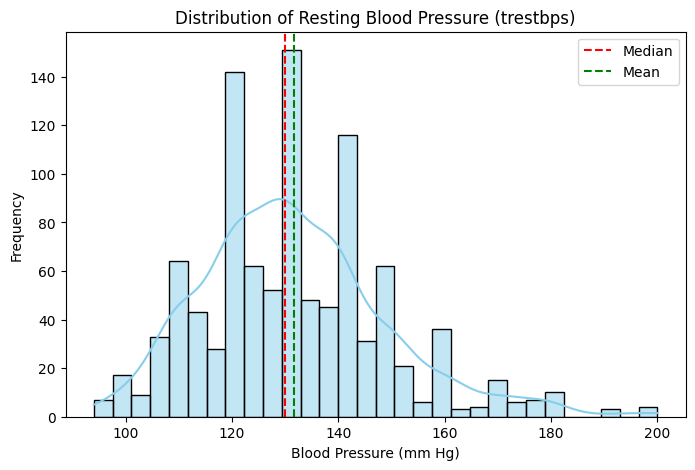

In [12]:
plt.figure(figsize=(8, 5))
sns.histplot(data["trestbps"], bins=30, kde=True, color="skyblue")
plt.axvline(data["trestbps"].median(), color="red", linestyle="dashed", label="Median")
plt.axvline(data["trestbps"].mean(), color="green", linestyle="dashed", label="Mean")
plt.legend()
plt.title("Distribution of Resting Blood Pressure (trestbps)")
plt.xlabel("Blood Pressure (mm Hg)")
plt.ylabel("Frequency")
plt.show()

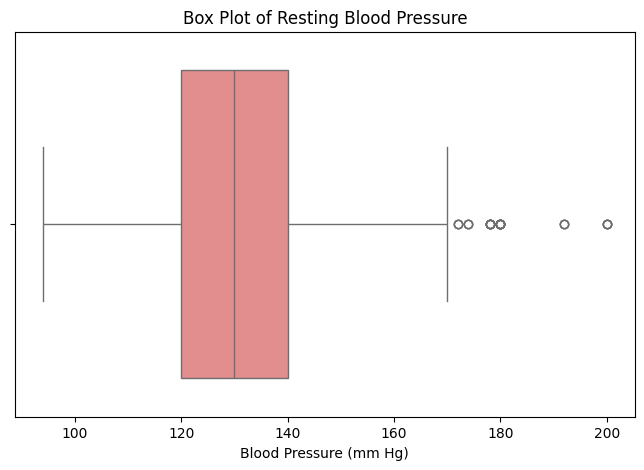

In [13]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data["trestbps"], color="lightcoral")
plt.title("Box Plot of Resting Blood Pressure")
plt.xlabel("Blood Pressure (mm Hg)")
plt.show()

In [14]:
from utils import analyze_column

analyze_column(data, ["trestbps"])


        TARGET VARIABLE: TRESTBPS
        Lower Bound for Outliers: 90.00
        Upper Bound for Outliers: 170.00
        Skewness Analysis: Right-skewed (Positive) → Mode < Median < Mean

        Outlier Detection
           - Total Outliers: 30
           - Outliers Above Upper Bound: [180, 178, 174, 180, 192, 200, 178, 192, 180, 200, 192, 172, 180, 174, 178, 180, 200, 180, 178, 180, 178, 174, 180, 200, 172, 180, 178, 178, 172, 180]
           - Outliers Below Lower Bound: None
        


C:\Users\USER\AppData\Local\Temp\ipykernel_12772\2842767324.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=data["target"], y=data["trestbps"], palette=["blue", "red"])


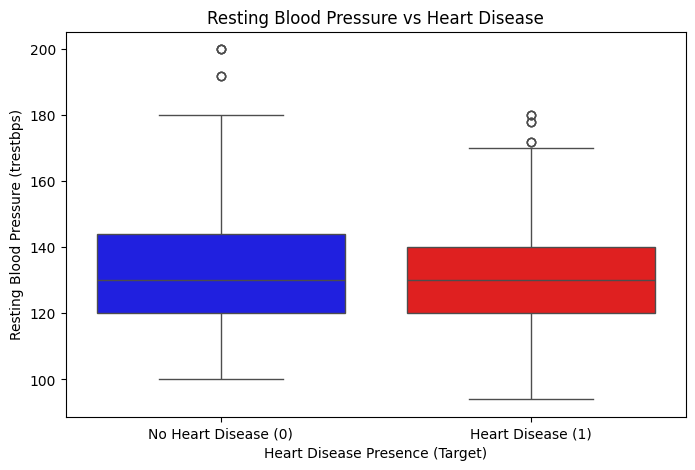

In [15]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=data["target"], y=data["trestbps"], palette=["blue", "red"])
plt.xticks([0, 1], ["No Heart Disease (0)", "Heart Disease (1)"])
plt.xlabel("Heart Disease Presence (Target)")
plt.ylabel("Resting Blood Pressure (trestbps)")
plt.title("Resting Blood Pressure vs Heart Disease")
plt.show()

Statistical data shows heart disease patients experience normally slightly higher average resting blood pressure levels than people without heart disease. Resting blood pressure measurements between heart patients and those without heart problems do not differ substantially so blood pressure alone might not predict independent heart disease risk.

In [16]:
data.corr()["trestbps"].drop("trestbps")

age        0.271121
sex       -0.078974
cp         0.038177
chol       0.127977
fbs        0.181767
restecg   -0.123794
thalach   -0.039264
exang      0.061197
oldpeak    0.187434
slope     -0.120445
ca         0.104554
thal       0.059276
target    -0.138772
Name: trestbps, dtype: float64

In [17]:
print("Features highly correlated with trestbps:")
print(
    data.corr()["trestbps"].drop("trestbps")[
        abs(data.corr()["trestbps"].drop("trestbps")) > 0.8
    ]
)

Features highly correlated with trestbps:
Series([], Name: trestbps, dtype: float64)


`trestbps` is not highly collinear with other predictors.
**It can be a good target variable for regression.**


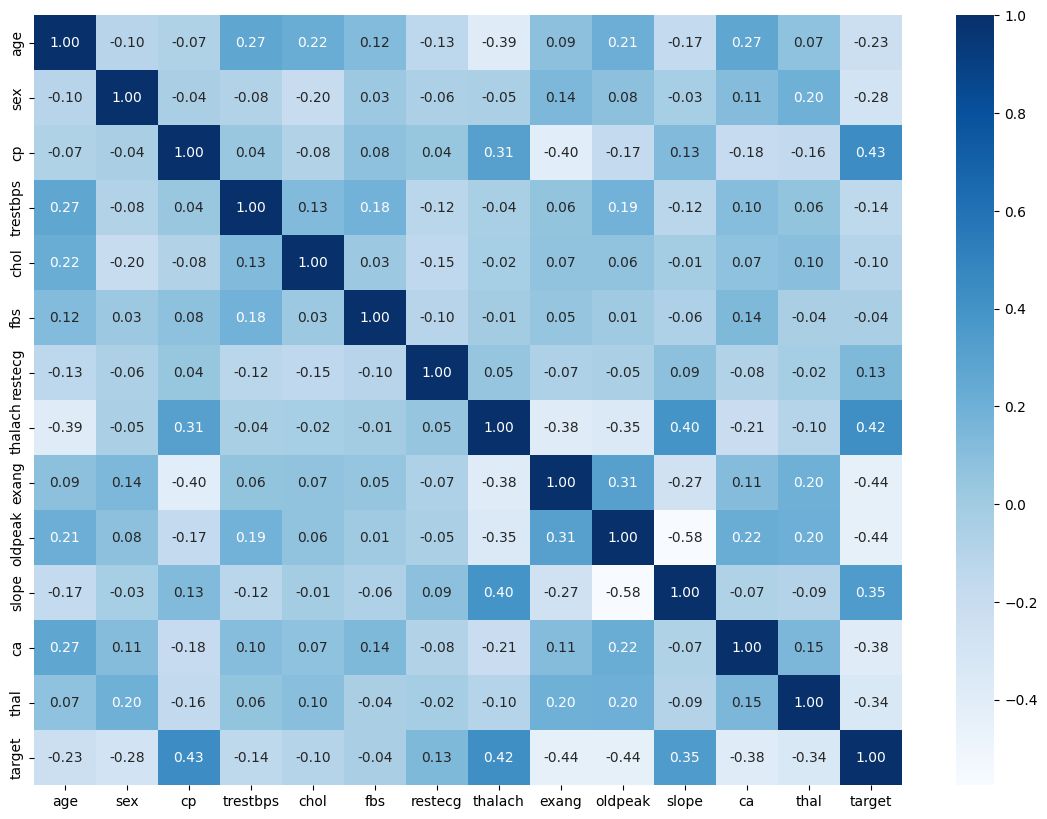

In [18]:
plt.figure(figsize=(14, 10))
sns.heatmap(data.corr(), annot=True, cmap="Blues", fmt=".2f")
plt.show()

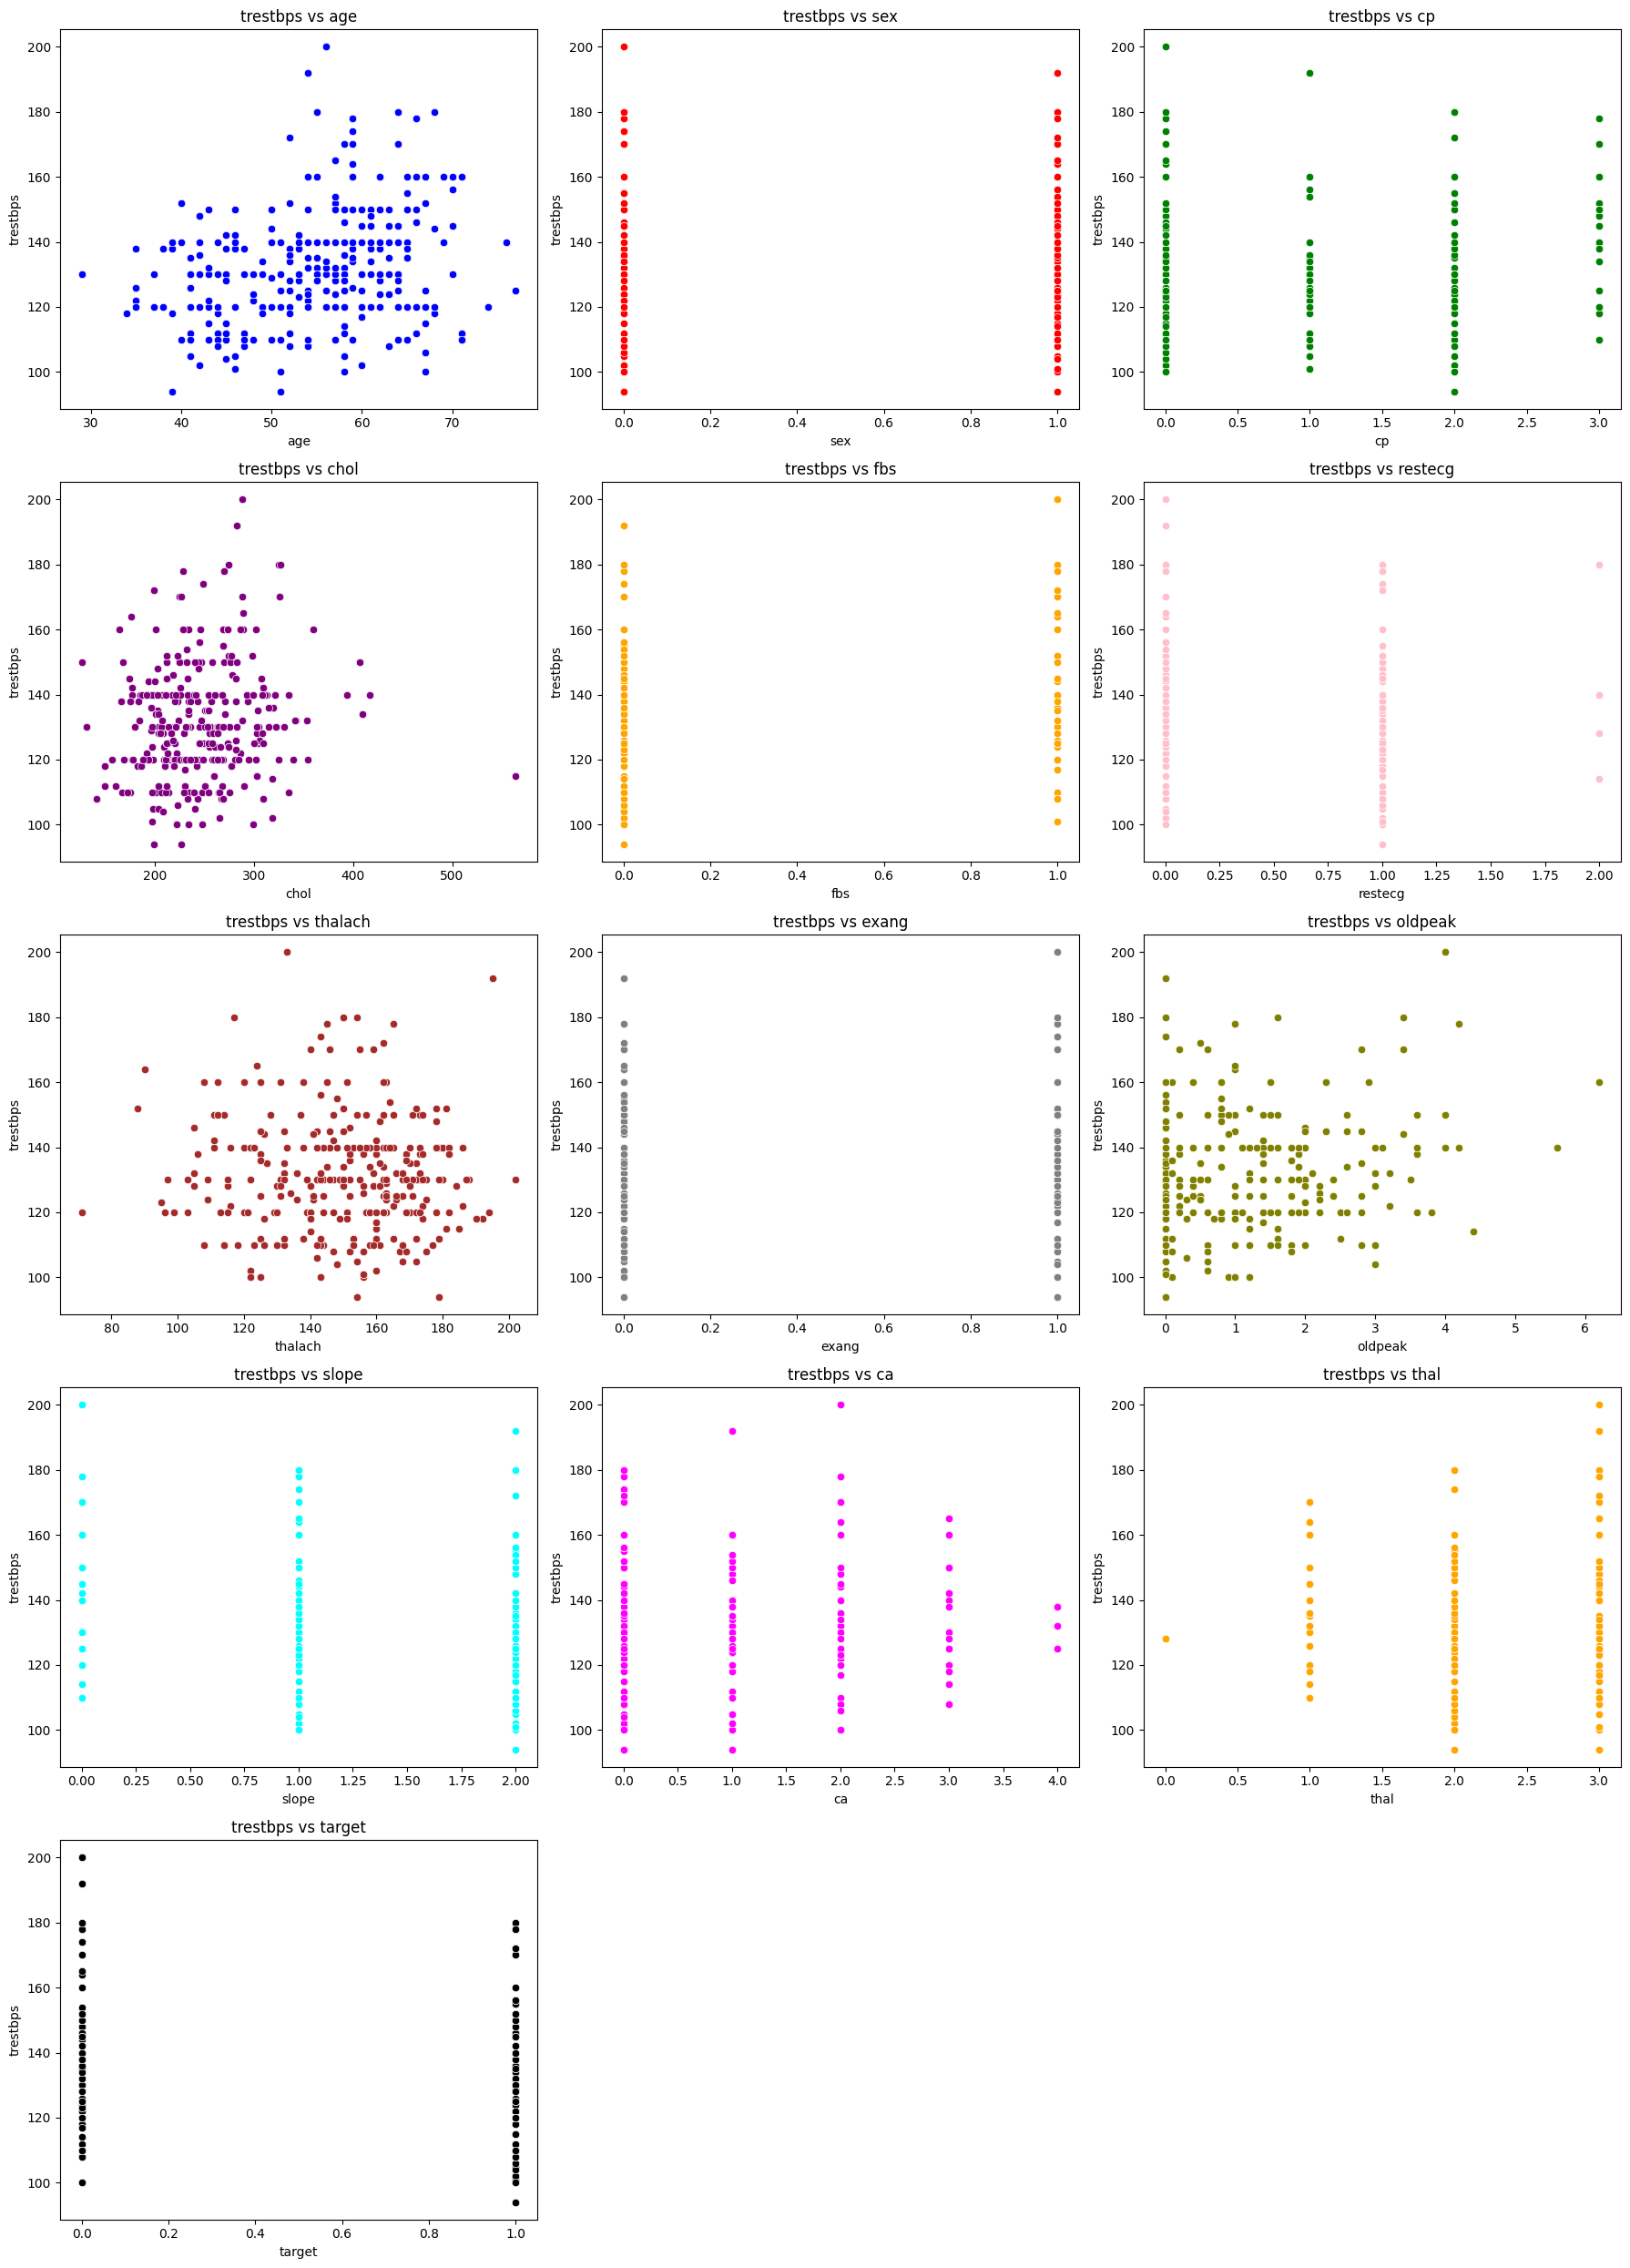

In [19]:
features = data.drop(columns=["trestbps"]).select_dtypes(include=["number"]).columns

num_features = len(features)

rows = (num_features // 3) + 1
cols = 3
# 13 colors
colors = [
    "blue",
    "red",
    "green",
    "purple",
    "orange",
    "pink",
    "brown",
    "gray",
    "olive",
    "cyan",
    "magenta",
    "orange",
    "black",
]
fig, axes = plt.subplots(rows, cols, figsize=(18, rows * 5))

axes = axes.flatten()

for i in range(num_features):
    sns.scatterplot(
        x=data[features[i]], y=data["trestbps"], ax=axes[i], color=colors[i % 13]
    )
    axes[i].set_title(f"trestbps vs {features[i]}")

for j in range(num_features, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

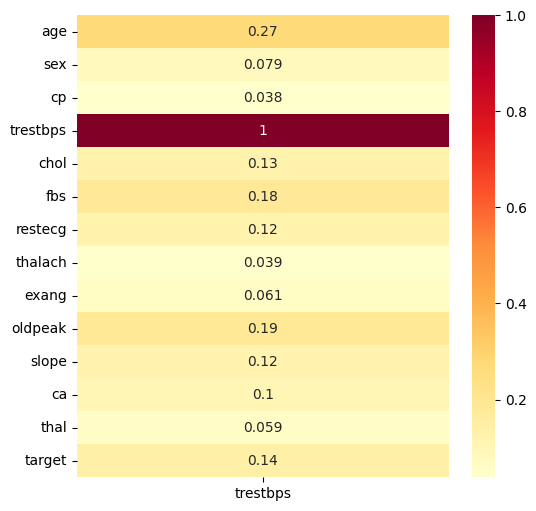

In [20]:
plt.figure(figsize=(6,6))
sns.heatmap(abs(data.corr().trestbps.to_frame()), annot=True, yticklabels=True, cmap='YlOrRd')
plt.show()

# Data Cleaning: Task 1

In [21]:
df = data.drop_duplicates(keep="first", inplace=False)

In [22]:
df.shape

(302, 14)

### Handling Outliers


In [23]:
analyze_column(df, ["age", "trestbps", "chol", "thalach", "oldpeak"])


        TARGET VARIABLE: AGE
        Lower Bound for Outliers: 28.50
        Upper Bound for Outliers: 80.50
        Skewness Analysis: Symmetric → Mean ≈ Median ≈ Mode

        Outlier Detection
           - Total Outliers: 0
           - Outliers Above Upper Bound: None
           - Outliers Below Lower Bound: None
        

        TARGET VARIABLE: TRESTBPS
        Lower Bound for Outliers: 90.00
        Upper Bound for Outliers: 170.00
        Skewness Analysis: Right-skewed (Positive) → Mode < Median < Mean

        Outlier Detection
           - Total Outliers: 9
           - Outliers Above Upper Bound: [180, 178, 174, 180, 192, 200, 172, 180, 178]
           - Outliers Below Lower Bound: None
        

        TARGET VARIABLE: CHOL
        Lower Bound for Outliers: 115.38
        Upper Bound for Outliers: 370.38
        Skewness Analysis: Right-skewed (Positive) → Mode < Median < Mean

        Outlier Detection
           - Total Outliers: 5
           - Outliers Above Upper Bo

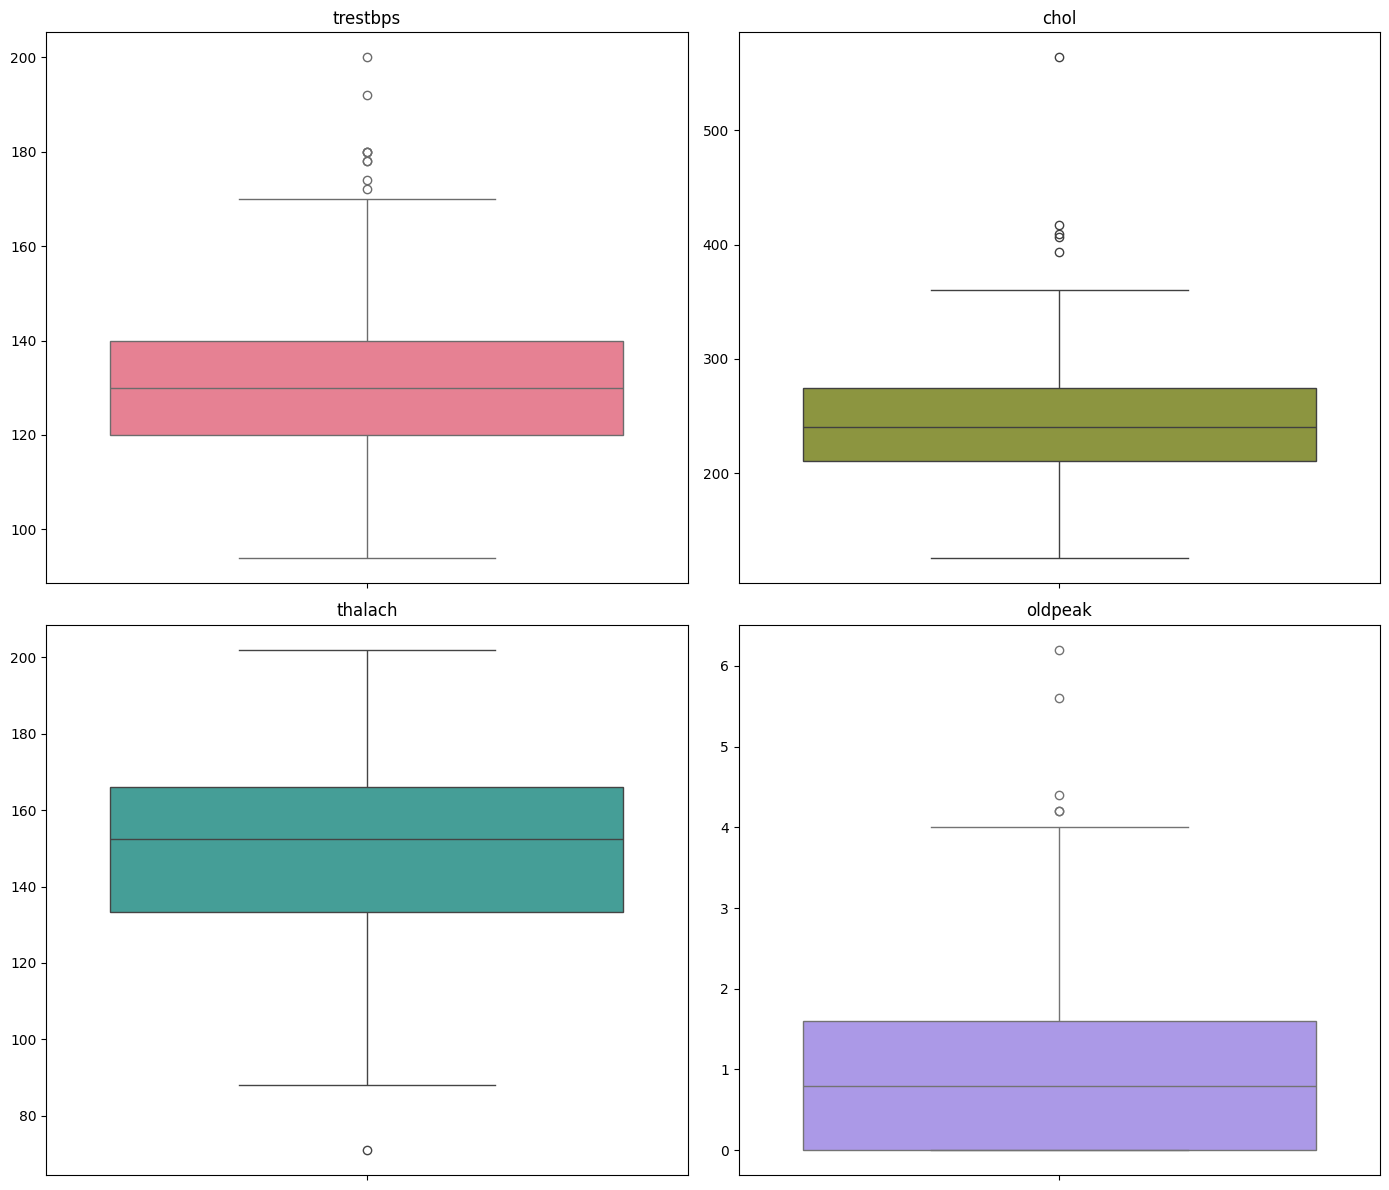

In [24]:
cols = ["trestbps", "chol", "thalach", "oldpeak"]

colors = sns.color_palette("husl", len(cols))

plt.figure(figsize=(14, 12))

for i in range(len(cols)):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[cols[i]], color=colors[i])
    plt.title(cols[i])
    plt.ylabel("")
plt.tight_layout()
plt.show()

#### handling the outlier (thalach)

In [25]:
df[df["thalach"] == 71][["age", "thalach"]]

,age,thalach
267,67,71


**For a 67 y/o, the maximum heart rate of 71 beats per minute (bpm) is generally considered low.**

In [26]:
df[(df["age"] >= 60) & (df["age"] <= 70)]["thalach"].median()

np.float64(144.0)

In [27]:
df.loc[(df["thalach"] == 71) & (df["age"] == 67), "thalach"] = df.loc[
    (df["age"] >= 60) & (df["age"] <= 70), "thalach"
].median()

print("Updated value for thalach:", df.loc[df["age"] == 67, "thalach"].values)

Updated value for thalach: [142 150 125 160 108 144 129 172 163]


Instead of replacing the outlier (71 bpm) with the overall median, I used the median thalach of people aged 60-70. The maximum heart rate of younger people is often higher than that of seniors.
This age-dependent variance is ignored and bias may be introduced when using an overall median.

C:\Users\USER\AppData\Local\Temp\ipykernel_12772\1456138468.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[cat_cols[i]], palette="husl")
C:\Users\USER\AppData\Local\Temp\ipykernel_12772\1456138468.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[cat_cols[i]], palette="husl")
C:\Users\USER\AppData\Local\Temp\ipykernel_12772\1456138468.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data[cat_cols[i]], palette="husl")
C:\Users\USER\AppData\Local\Temp\ipykernel_12772\1456138468.py:6: FutureWarning: 

Passing `pa

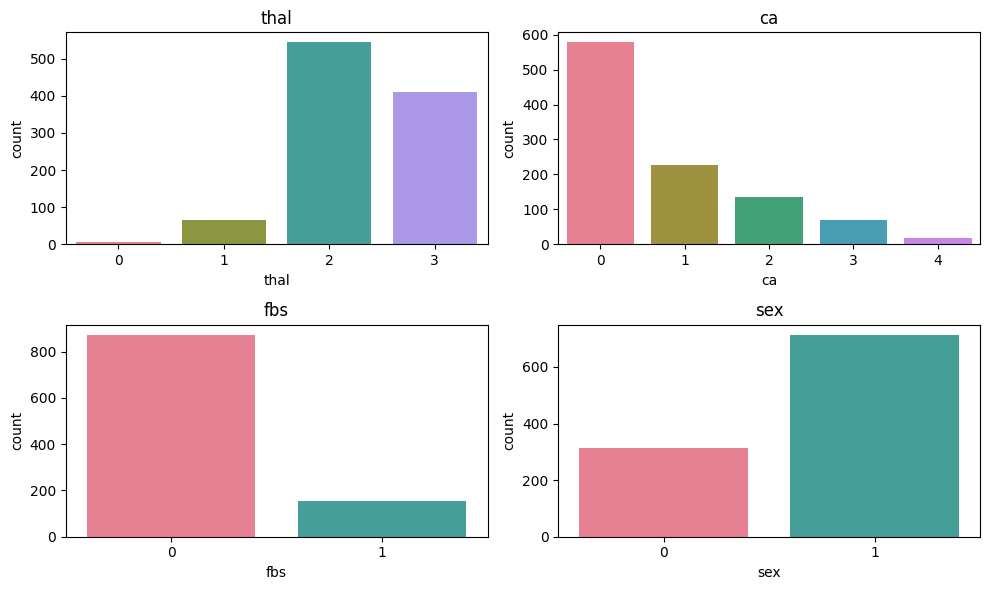

In [28]:
cat_cols = ["thal", "ca", "fbs", "sex"]

plt.figure(figsize=(10, 6))
for i in range(len(cat_cols)):
    plt.subplot(2, 2, i + 1)
    sns.countplot(x=data[cat_cols[i]], palette="husl")
    plt.title(cat_cols[i])

plt.tight_layout()
plt.show()

#### 4 as an unexpected value in ca

In [29]:
df["ca"].value_counts()

ca
0    175
1     65
2     38
3     20
4      4
Name: count, dtype: int64

The **number of main vessels (0–3) colored by fluoroscopy** is represented by the 'ca' feature. However, **4** remains as an unexpected value here.

The value `4` does not seem to align with standard medical definitions as found online.  
The fact that `4` only shows up four times in our newly cleaned dataframe after counting the occurrences suggests that there may have been an input error or misclassification

Since 'ca' is **ordinal** (ordered categories), we can avoid distorting the dataset by substituting `4` with the **most common valid value (mode)**, which is 0. Replacing the rows preserves more information because dropping them could reduce the amount of the data.

In [30]:
df.loc[:, "ca"] = df["ca"].replace(4, df["ca"].mode()[0])

In [31]:
df["ca"].value_counts()

ca
0    179
1     65
2     38
3     20
Name: count, dtype: int64

#### handling outliers in trestbps

In [32]:
df['trestbps'].value_counts()[[180, 178, 174, 192, 200, 172]]

trestbps
180    3
178    2
174    1
192    1
200    1
172    1
Name: count, dtype: int64

In [33]:
extreme_trestbps = df[df['trestbps'] > 180]
extreme_trestbps_summary = extreme_trestbps[['age', 'chol', 'thalach', 'target', 'sex']].describe()

extreme_trestbps_age = extreme_trestbps['age'].value_counts()
extreme_trestbps_chol = extreme_trestbps['chol'].value_counts()
extreme_trestbps_thalach = extreme_trestbps['thalach'].value_counts()

print(extreme_trestbps_summary)
print(extreme_trestbps_age)
print(extreme_trestbps_chol)
print(extreme_trestbps_thalach)


             age        chol    thalach  target       sex
count   2.000000    2.000000    2.00000     2.0  2.000000
mean   55.000000  285.500000  164.00000     0.0  0.500000
std     1.414214    3.535534   43.84062     0.0  0.707107
min    54.000000  283.000000  133.00000     0.0  0.000000
25%    54.500000  284.250000  148.50000     0.0  0.250000
50%    55.000000  285.500000  164.00000     0.0  0.500000
75%    55.500000  286.750000  179.50000     0.0  0.750000
max    56.000000  288.000000  195.00000     0.0  1.000000
age
54    1
56    1
Name: count, dtype: int64
chol
283    1
288    1
Name: count, dtype: int64
thalach
195    1
133    1
Name: count, dtype: int64


In [34]:
df.loc[df['trestbps'] > 170, 'trestbps'] = 170


In [35]:
df.loc[df['chol'] > 370, 'chol'] = 370

In [36]:
df.loc[df['oldpeak'] > 4, 'oldpeak'] = 4

In [37]:
analyze_column(df, ['trestbps', 'chol', 'oldpeak'])


        TARGET VARIABLE: TRESTBPS
        Lower Bound for Outliers: 90.00
        Upper Bound for Outliers: 170.00
        Skewness Analysis: Symmetric → Mean ≈ Median ≈ Mode

        Outlier Detection
           - Total Outliers: 0
           - Outliers Above Upper Bound: None
           - Outliers Below Lower Bound: None
        

        TARGET VARIABLE: CHOL
        Lower Bound for Outliers: 115.38
        Upper Bound for Outliers: 370.38
        Skewness Analysis: Symmetric → Mean ≈ Median ≈ Mode

        Outlier Detection
           - Total Outliers: 0
           - Outliers Above Upper Bound: None
           - Outliers Below Lower Bound: None
        

        TARGET VARIABLE: OLDPEAK
        Lower Bound for Outliers: -2.40
        Upper Bound for Outliers: 4.00
        Skewness Analysis: Right-skewed (Positive) → Mode < Median < Mean

        Outlier Detection
           - Total Outliers: 0
           - Outliers Above Upper Bound: None
           - Outliers Below Lower Bound: N

Outliers were present but in small numbers, so removing them entirely would cause unnecessary data loss. Instead, in order to avoid skewed results, I only capped extreme values. 
While some high values are acceptable, extreme situations (such as trestbps >= 200) are uncommon. There were not many outliers, so their impact on the dataset seems minimal. 

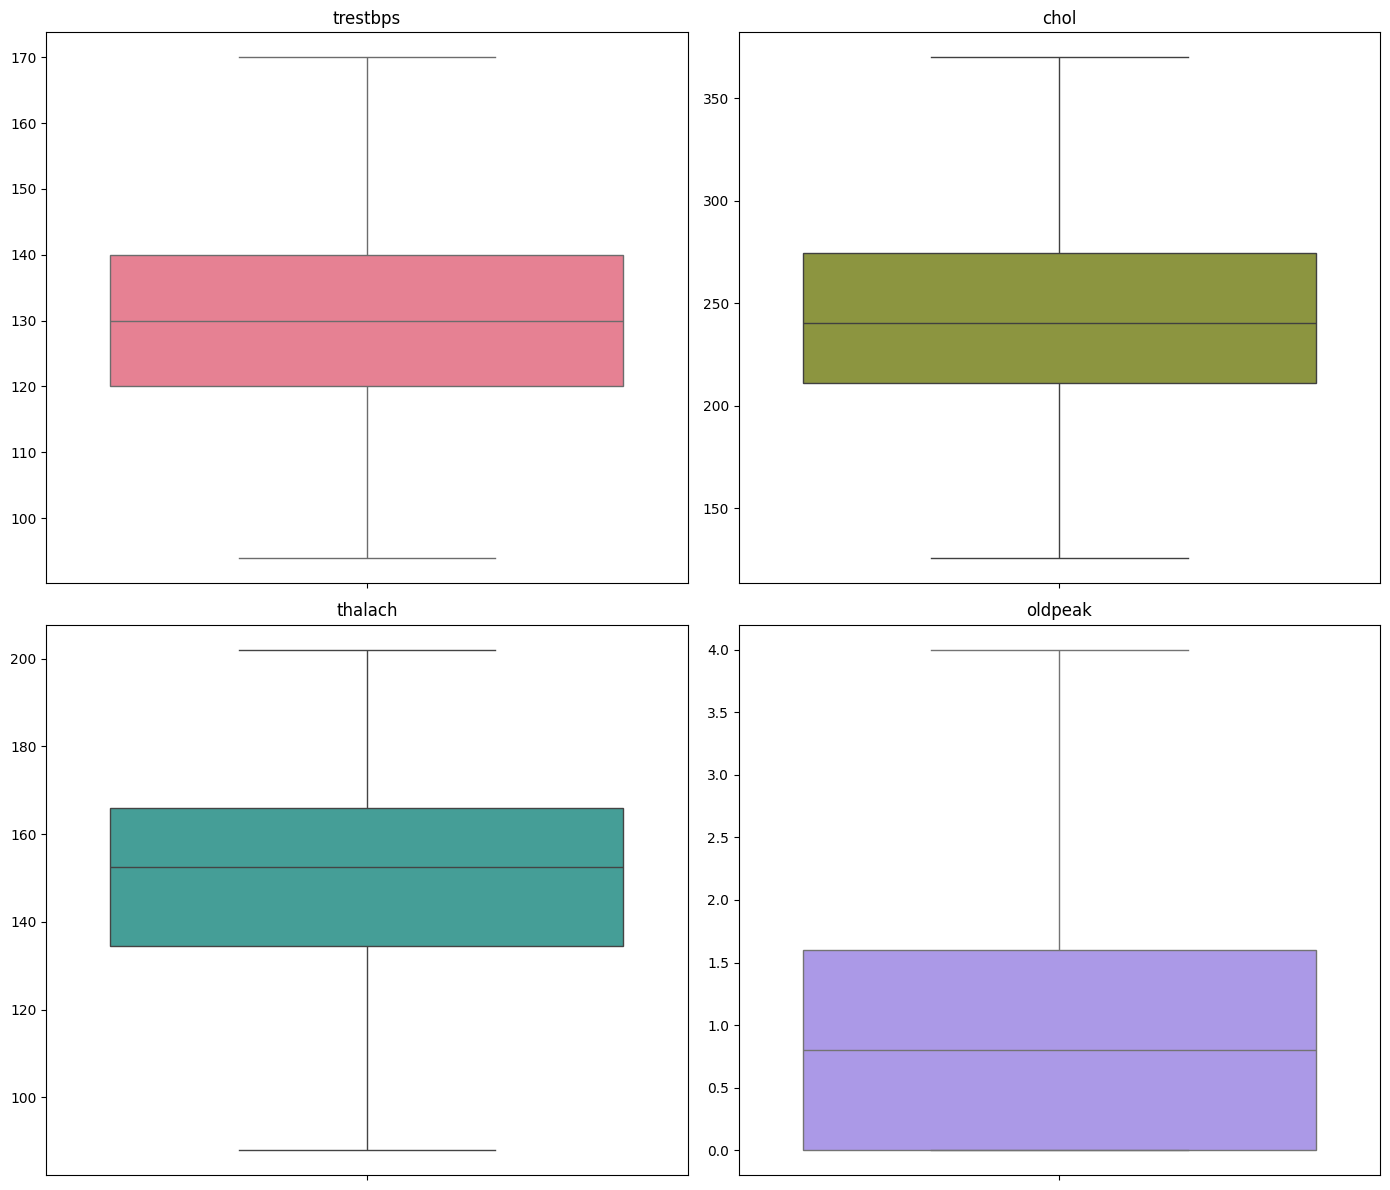

In [38]:
cols = ["trestbps", "chol", "thalach", "oldpeak"]

colors = sns.color_palette("husl", len(cols))

plt.figure(figsize=(14, 12))

for i in range(len(cols)):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(y=df[cols[i]], color=colors[i])
    plt.title(cols[i])
    plt.ylabel("")
plt.tight_layout()
plt.show()

In [39]:
df1 = pd.get_dummies(df, columns=['cp', 'restecg', 'thal'], 
                    prefix=['Chest_Pain', 'Electrocardiographic', 'Thal_type'])

df1 = df1.astype(int)
df1


,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,...,Chest_Pain_1,Chest_Pain_2,Chest_Pain_3,Electrocardiographic_0,Electrocardiographic_1,Electrocardiographic_2,Thal_type_0,Thal_type_1,Thal_type_2,Thal_type_3
0,52,1,125,212,0,168,0,1,2,2,...,0,0,0,0,1,0,0,0,0,1
1,53,1,140,203,1,155,1,3,0,0,...,0,0,0,1,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2,0,0,...,0,0,0,0,1,0,0,0,0,1
3,61,1,148,203,0,161,0,0,2,1,...,0,0,0,0,1,0,0,0,0,1
4,62,0,138,294,1,106,0,1,1,3,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,120,211,0,115,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0
733,44,0,108,141,0,175,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
739,52,1,128,255,0,161,1,0,2,1,...,0,0,0,0,1,0,0,0,0,1
843,59,1,160,273,0,125,0,0,2,0,...,0,0,1,1,0,0,0,0,1,0


# Data Preprocessing: Task 1

In [40]:
df1 = pd.get_dummies(df, columns=['cp', 'restecg', 'thal'], 
                    prefix=['Chest_Pain', 'Electrocardiographic', 'Thal_type'])

df1 = df1.astype(int)
df1

,age,sex,trestbps,chol,fbs,thalach,exang,oldpeak,slope,ca,...,Chest_Pain_1,Chest_Pain_2,Chest_Pain_3,Electrocardiographic_0,Electrocardiographic_1,Electrocardiographic_2,Thal_type_0,Thal_type_1,Thal_type_2,Thal_type_3
0,52,1,125,212,0,168,0,1,2,2,...,0,0,0,0,1,0,0,0,0,1
1,53,1,140,203,1,155,1,3,0,0,...,0,0,0,1,0,0,0,0,0,1
2,70,1,145,174,0,125,1,2,0,0,...,0,0,0,0,1,0,0,0,0,1
3,61,1,148,203,0,161,0,0,2,1,...,0,0,0,0,1,0,0,0,0,1
4,62,0,138,294,1,106,0,1,1,3,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
723,68,0,120,211,0,115,0,1,1,0,...,0,1,0,1,0,0,0,0,1,0
733,44,0,108,141,0,175,0,0,1,0,...,0,1,0,0,1,0,0,0,1,0
739,52,1,128,255,0,161,1,0,2,1,...,0,0,0,0,1,0,0,0,0,1
843,59,1,160,273,0,125,0,0,2,0,...,0,0,1,1,0,0,0,0,1,0


In [41]:
from sklearn.model_selection import train_test_split

X = df1.drop(columns=['target'])  
y = df1['target'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training set: 211 samples
Test set: 91 samples


# Linear Regression from Scratch: Task 2

In [64]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def initialize_parameters(n_features):
    return np.random.randn(n_features) * 0.01, 0 

def predict(X, weights, bias):
    return np.dot(X, weights) + bias

def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def update_parameters(X, y, weights, bias, learning_rate):
    n = X.shape[0]
    y_pred = predict(X, weights, bias)
    dw = -2/n * np.dot(X.T, (y - y_pred))  # Gradient for weights
    db = -2/n * np.sum(y - y_pred)         # Gradient for bias
    weights -= learning_rate * dw
    bias -= learning_rate * db
    return weights, bias

def train_linear_regression(X, y, learning_rate=0.001, iterations=2000):
    n_features = X.shape[1]
    weights, bias = initialize_parameters(n_features)
    losses = []

    for iter in range(iterations):
        weights, bias = update_parameters(X, y, weights, bias, learning_rate)
        loss = compute_loss(y, predict(X, weights, bias))
        losses.append(loss)

    return weights, bias, losses

def plot_loss_curve(losses):
    plt.plot(losses)
    plt.xlabel("Iterations")
    plt.ylabel("Loss (MSE)")
    plt.title("Loss Curve for Linear Regression")
    plt.show()



In [43]:
weights, bias, losses = train_linear_regression(X_train_scaled, y_train, iterations=2000)

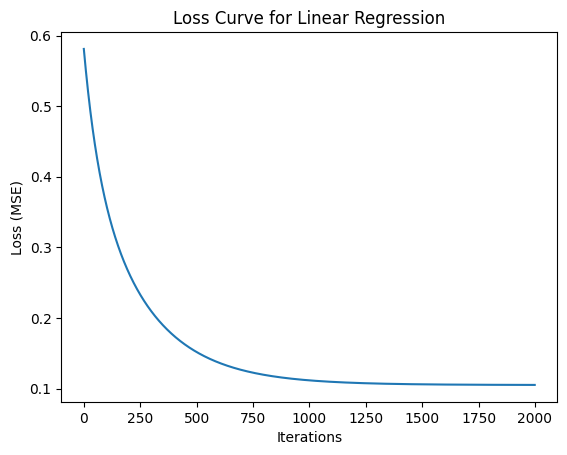

In [44]:
plt.plot(losses)
plt.xlabel("Iterations")
plt.ylabel("Loss (MSE)")
plt.title("Loss Curve for Linear Regression")
plt.show()

In [45]:
y_train_pred = predict(X_train_scaled, weights, bias)
y_test_pred = predict(X_test_scaled, weights, bias)

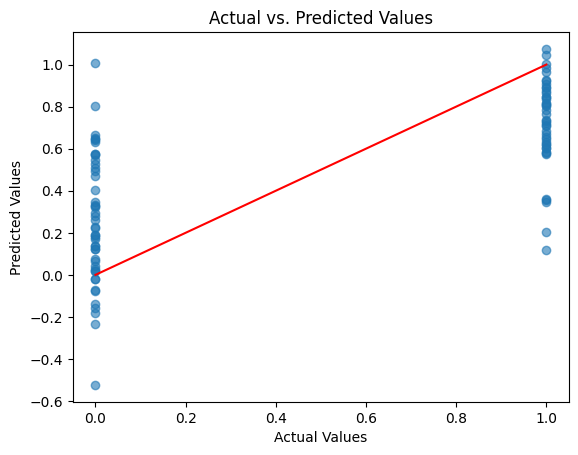

In [46]:
plt.scatter(y_test, y_test_pred, alpha=0.6)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # 45-degree reference line
plt.show()

In [47]:
mae = []
mse = []
rmse = []
r2 = []

In [48]:

mae.append(mean_absolute_error(y_train, y_train_pred))
mse.append(mean_squared_error(y_train, y_train_pred))
rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
r2.append(r2_score(y_train, y_train_pred))

print("on train set")

print(f"Mean Absolute Error: {mae[-1]}")
print(f"Mean Squared Error: {mse[-1]}")
print(f"Root Mean Squared Error: {rmse[-1]}")
print(f"R² Score: {r2[-1]:.4f}")

on train set
Mean Absolute Error: 0.25111509334406856
Mean Squared Error: 0.10510914410454127
Root Mean Squared Error: 0.32420540418774835
R² Score: 0.5703


In [49]:
mae.append(mean_absolute_error(y_test, y_test_pred))
mse.append(mean_squared_error(y_test, y_test_pred))
rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
r2.append(r2_score(y_test, y_test_pred))

print("On test set")

print(f"Mean Absolute Error: {mae[-1]}")
print(f"Mean Squared Error: {mse[-1]}")
print(f"Root Mean Squared Error: {rmse[-1]}")
print(f"R² Score: {r2[-1]:.4f}")


On test set
Mean Absolute Error: 0.3005899209520337
Mean Squared Error: 0.14036840026230749
Root Mean Squared Error: 0.37465771080054855
R² Score: 0.4368


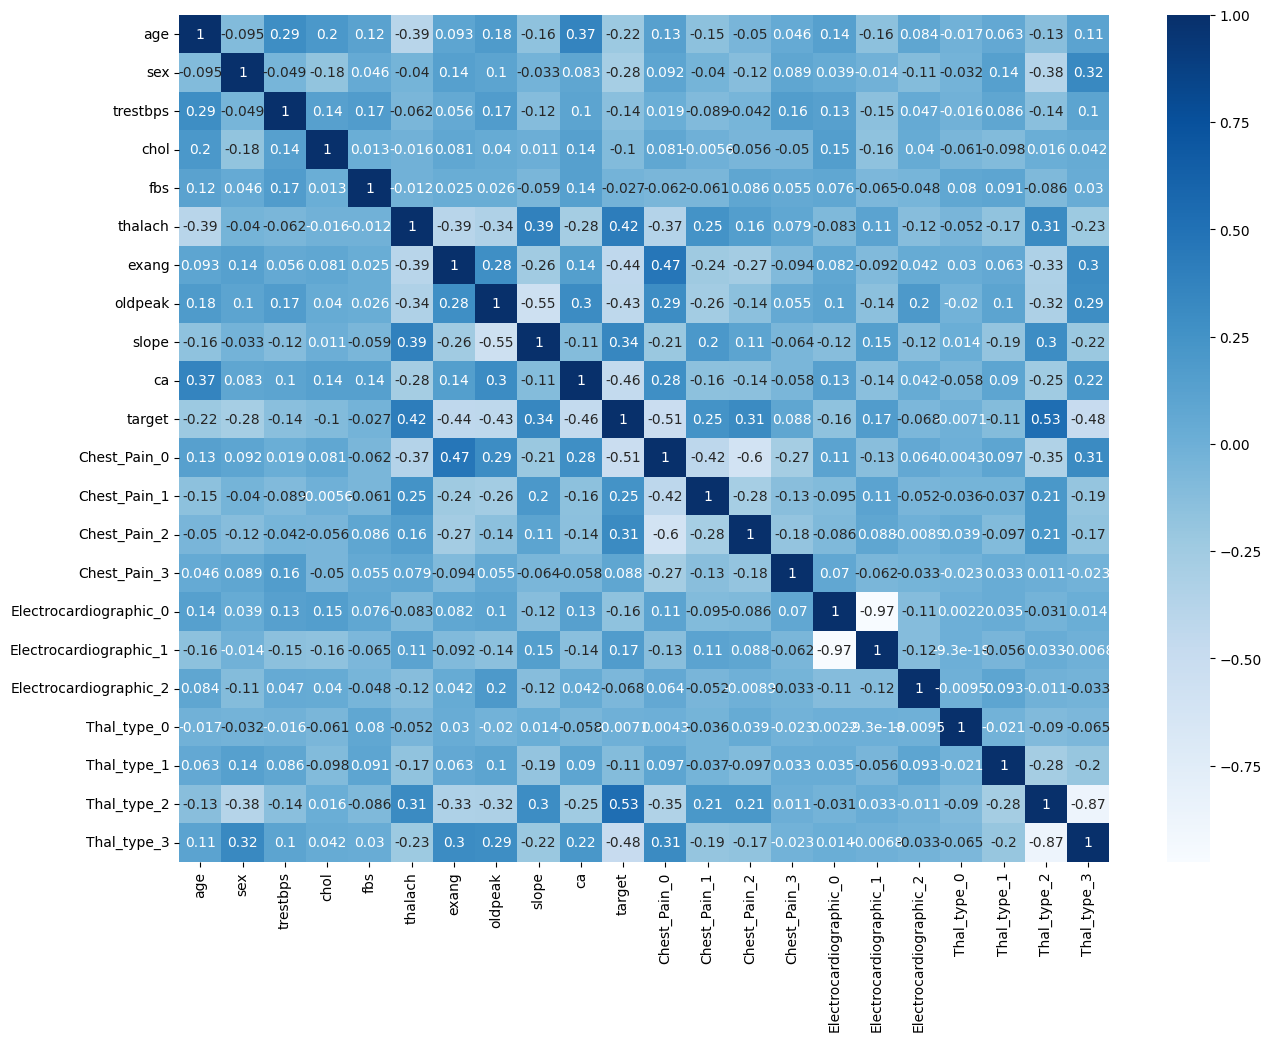

In [50]:
plt.figure(figsize=(15, 11))
correlation_matrix = df1.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='Blues')
plt.show()

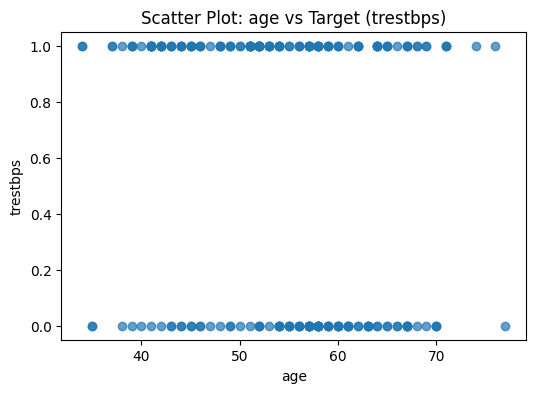

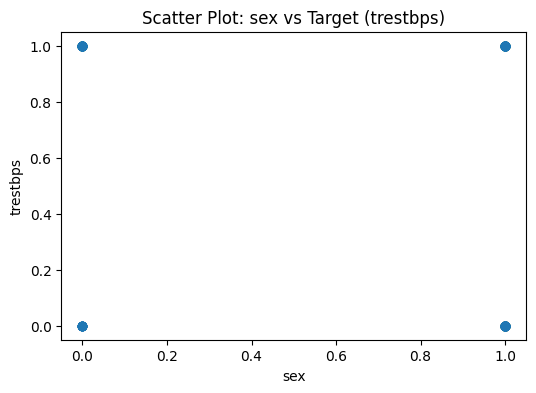

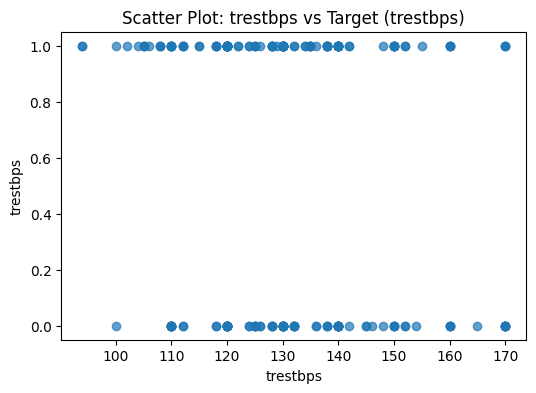

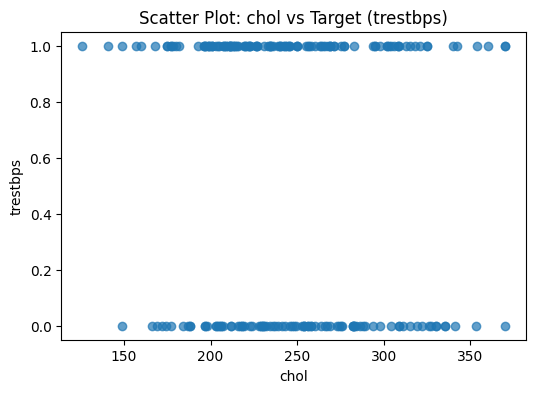

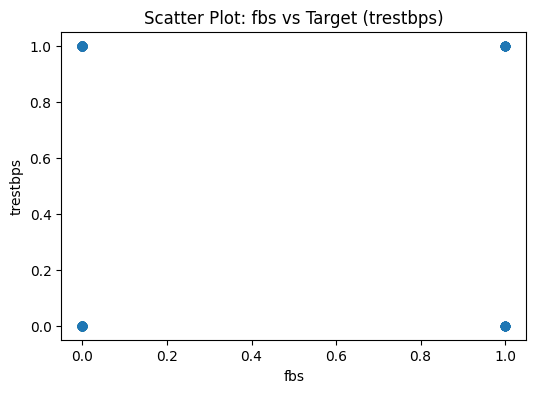

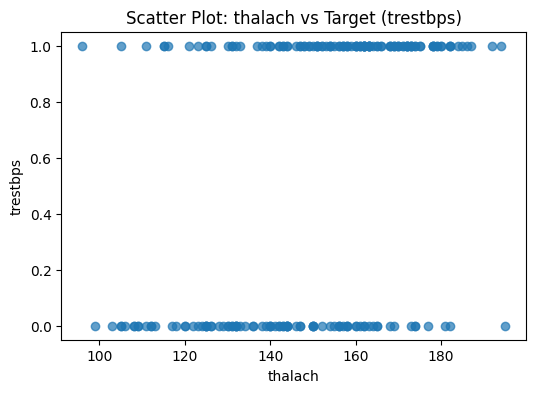

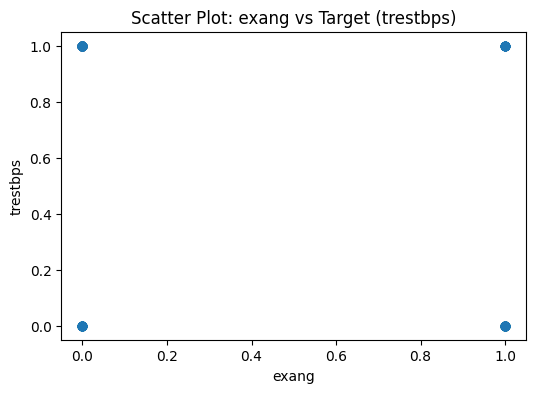

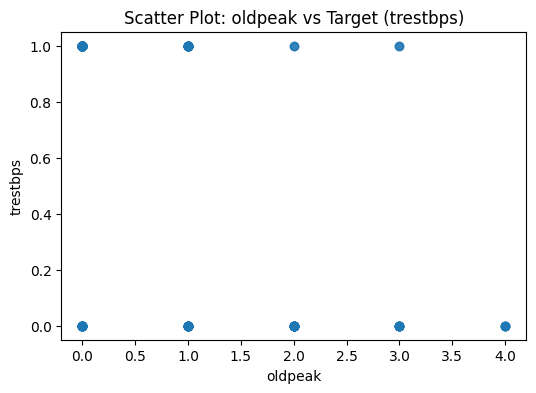

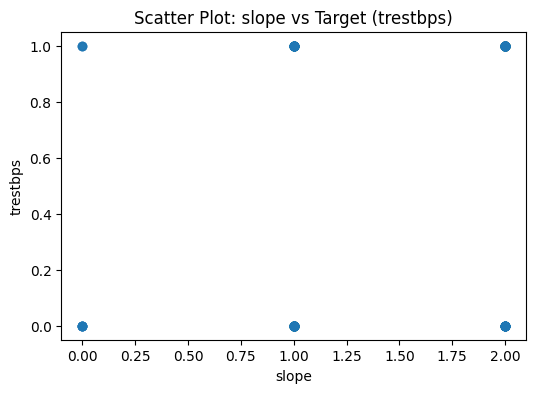

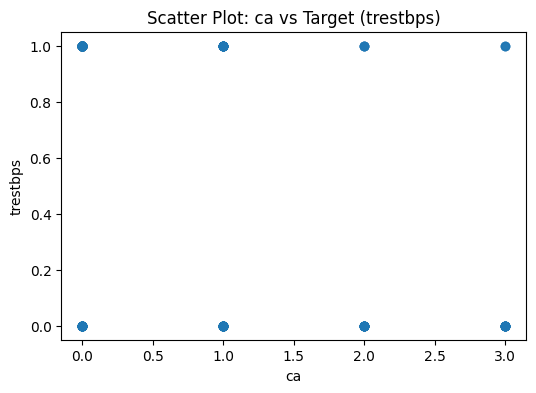

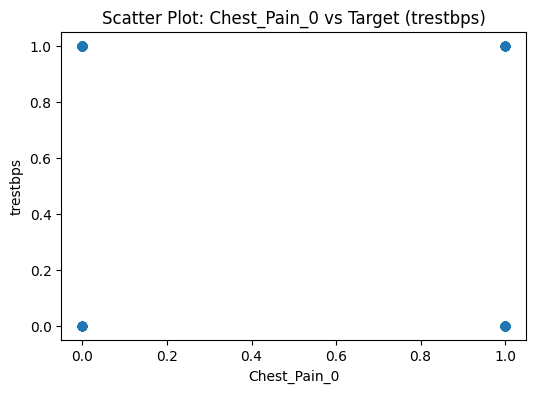

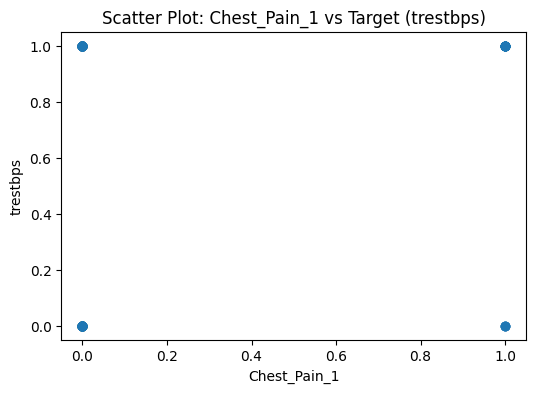

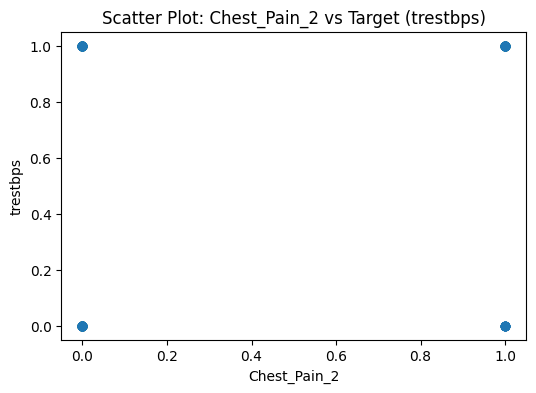

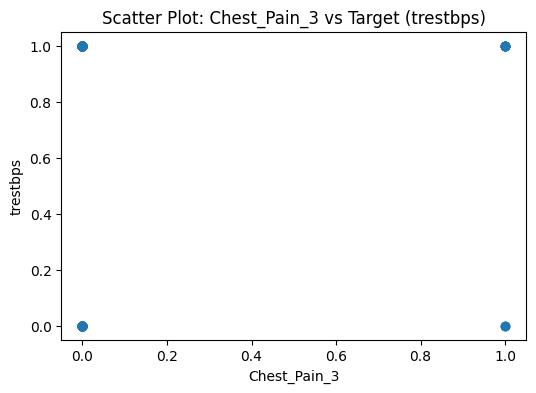

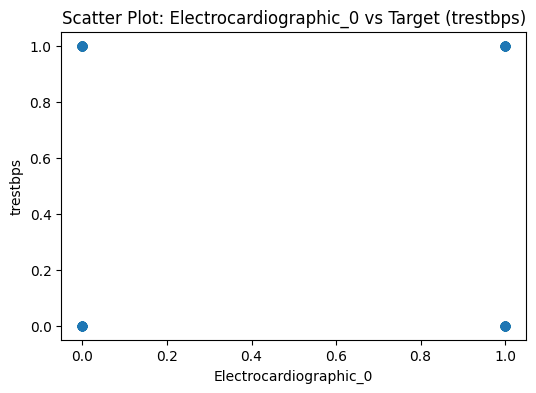

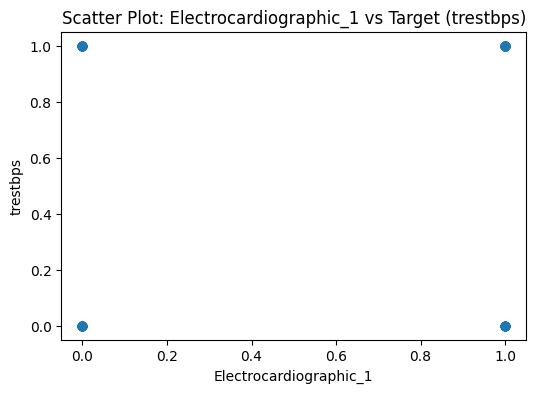

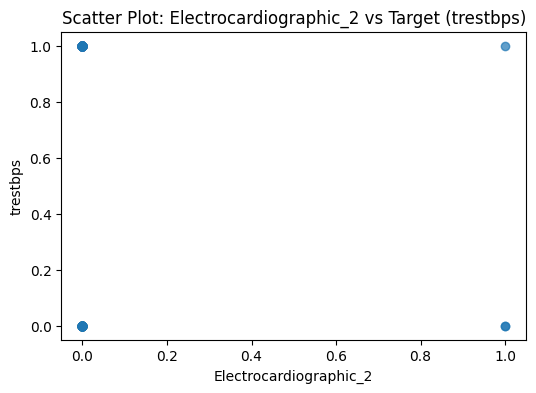

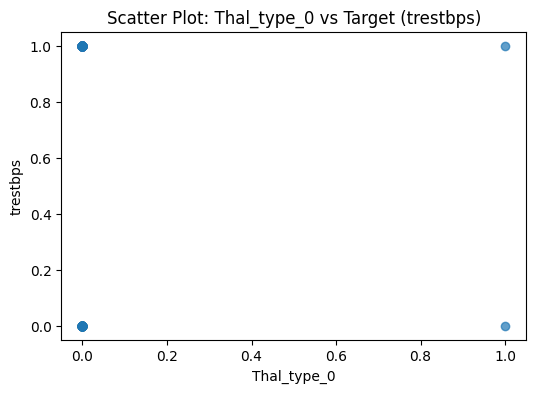

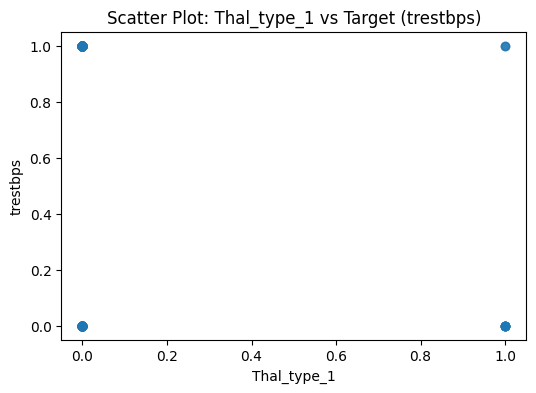

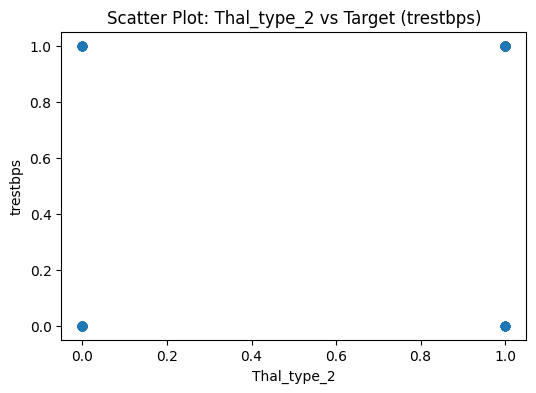

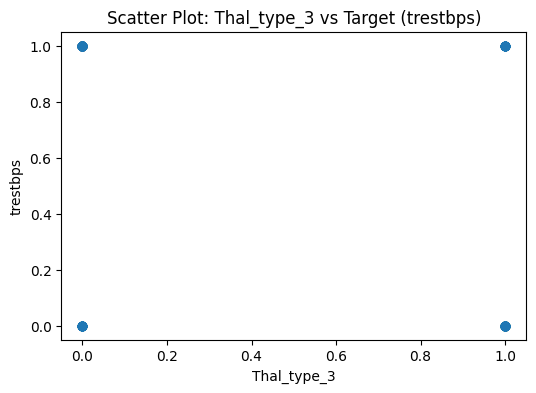

In [51]:

def plot_scatter(x, y):
    for feature in x.columns:
        plt.figure(figsize=(6, 4))
        plt.scatter(x[feature], y, alpha=0.7)
        plt.title(f"Scatter Plot: {feature} vs Target (trestbps)")
        plt.xlabel(feature)
        plt.ylabel('trestbps')
        plt.show()

plot_scatter(X_train, y_train)


**clearly linear regression might not be the best model for this dataset.**

# Primary Models: Task 3

## Decision Tree Regressor

In [52]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=42)
dt_reg.fit(X_train, y_train)

y_train_pred = dt_reg.predict(X_train)
y_test_pred = dt_reg.predict(X_test)

In [53]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Decision Tree Regression Performance:")
print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Training R²: {train_r2}")
print(f"Test R²: {test_r2}")

Decision Tree Regression Performance:
Training MSE: 0.0
Test MSE: 0.23076923076923078
Training R²: 1.0
Test R²: 0.07412790697674443


## Random Forest Regressor

In [54]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

y_train_pred = rf_reg.predict(X_train)
y_test_pred = rf_reg.predict(X_test)

train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Random Forest Regression Performance:")
print(f"Training MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Training R²: {train_r2}")
print(f"Test R²: {test_r2}")

Random Forest Regression Performance:
Training MSE: 0.019798104265402846
Test MSE: 0.13410109890109892
Training R²: 0.9190604775022957
Test R²: 0.46197131782945744


# Hyperparameter optimization using Cross validation

## Decision tree regressor

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

param_grid = {
    'criterion': ['squared_error', 'absolute_error'],   # Loss function
    'splitter': ['best', 'random'],                    # How to split
    'max_depth': [3, 5, 10],                            # Tree depth (removed None)
    'min_samples_split': [2, 5, 10, 20],                # Min samples to split a node
    'min_samples_leaf': [1, 2, 4, 10],                  # Min samples in a leaf node
    'max_features': ['auto', 'sqrt', 'log2'],           # Features to consider for best split (removed None)
    'max_leaf_nodes': [10, 20, 50],                     # Max number of leaf nodes (removed None)
    'min_weight_fraction_leaf': [0.0, 0.1, 0.2]        # Minimum weight fraction for a leaf node
}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=42), param_grid, 
                           scoring='neg_mean_squared_error', cv=5, verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

best_dt = grid_search.best_estimator_

print("\nBest Hyperparameters:", grid_search.best_params_)


Fitting 5 folds for each of 5184 candidates, totalling 25920 fits


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
8640 fits failed out of a total of 25920.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5039 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c


Best Hyperparameters: {'criterion': 'squared_error', 'max_depth': 5, 'max_features': 'sqrt', 'max_leaf_nodes': 20, 'min_samples_leaf': 2, 'min_samples_split': 5, 'min_weight_fraction_leaf': 0.0, 'splitter': 'random'}


c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_search.py:1107: UserWarning: One or more of the test scores are non-finite: [        nan         nan         nan ... -0.26165559 -0.22292359
 -0.2414175 ]
  warnings.warn(


## Random Forest Regressor

In [66]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

param_grid = {
    'n_estimators': np.arange(100, 1001, 100),  
    'max_depth': [10, 20, 30, 40, 50],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],  
    'max_features': ['auto', 'sqrt', 'log2'], 
    'bootstrap': [True, False],  
}

rf = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(
    estimator=rf, 
    param_distributions=param_grid, 
    n_iter=100, 
    cv=3,  
    verbose=2,  
    random_state=42,
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_

print("Best Hyperparameters for Random Forest:")
print(best_params)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.3s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.0s
[CV] END bootstrap=True, max_depth=50, max_features=log2, min_samples_leaf=4, min_samples_split=5, n_estimators=1000; total time=   1.1s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.2s
[CV] END bootstrap=True, max_depth=50, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   0.3s
[CV] END bootstrap=True, max_depth=50, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=70

c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py:528: FitFailedWarning: 
93 fits failed out of a total of 300.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
93 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\model_selection\_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\USER\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py", line 1382, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "c:\User

Best Hyperparameters for Random Forest:
{'n_estimators': np.int64(400), 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 20, 'bootstrap': True}


# Feature Selection

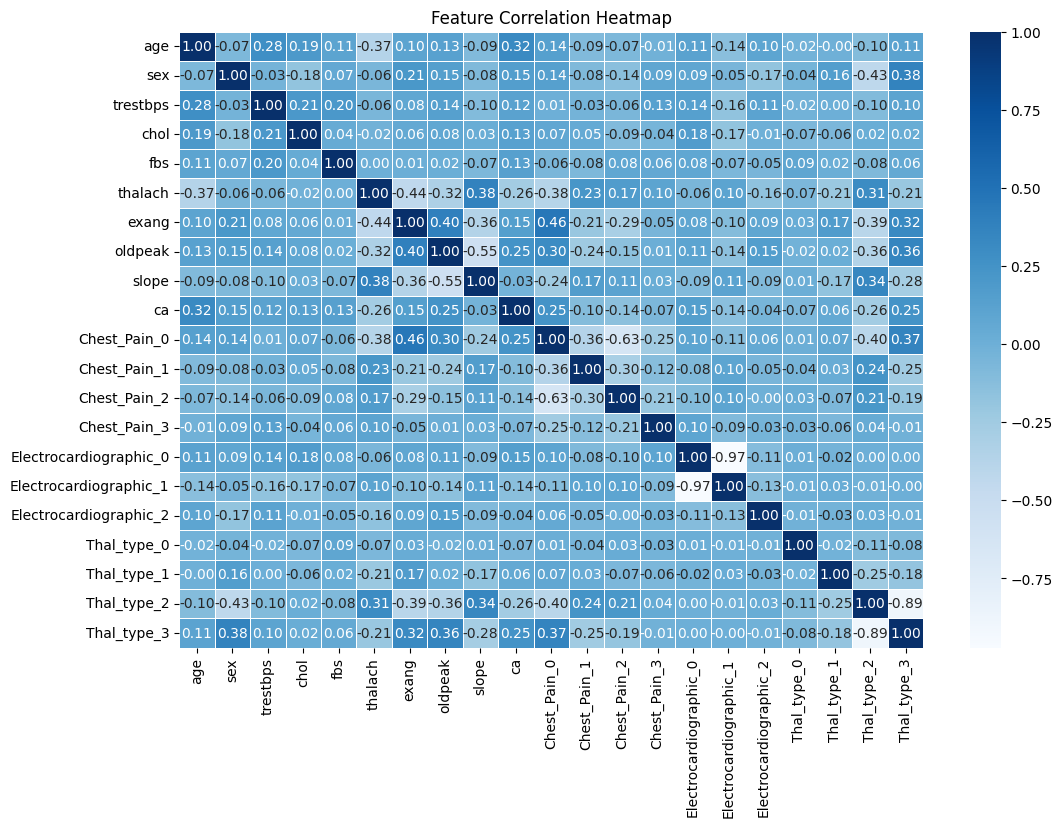

Highly Correlated Features to Remove: {'Thal_type_2', 'Electrocardiographic_1', 'Electrocardiographic_0', 'Thal_type_3'}


C:\Users\USER\AppData\Local\Temp\ipykernel_12772\3143236935.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if corr_pairs[i] > threshold:


In [68]:
corr_matrix = X_train.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="Blues", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

threshold = 0.85
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr_features = set()

for i in range(len(corr_pairs)):
    if corr_pairs.index[i][0] != corr_pairs.index[i][1]:  
        if corr_pairs[i] > threshold:
            high_corr_features.add(corr_pairs.index[i][1])

print("Highly Correlated Features to Remove:", high_corr_features)

In [58]:
X2_train = X_train.drop(columns=high_corr_features)
X2_test = X_test.drop(columns=high_corr_features)


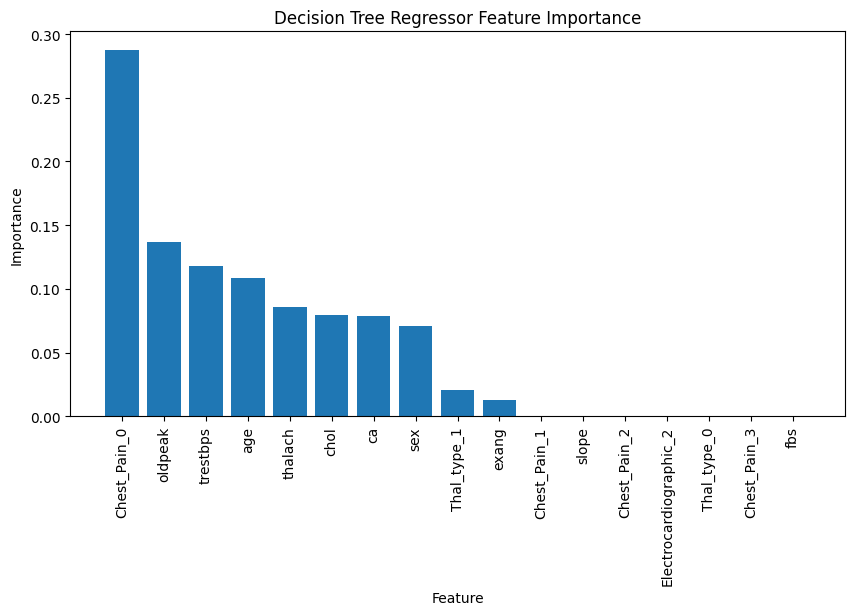

In [69]:
dt = DecisionTreeRegressor(random_state=42)

dt.fit(X2_train, y_train)

feature_importances = dt.feature_importances_

sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 5))
plt.bar(range(X2_train.shape[1]), feature_importances[sorted_indices])
plt.xticks(range(X2_train.shape[1]), X2_train.columns[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Decision Tree Regressor Feature Importance")
plt.show()


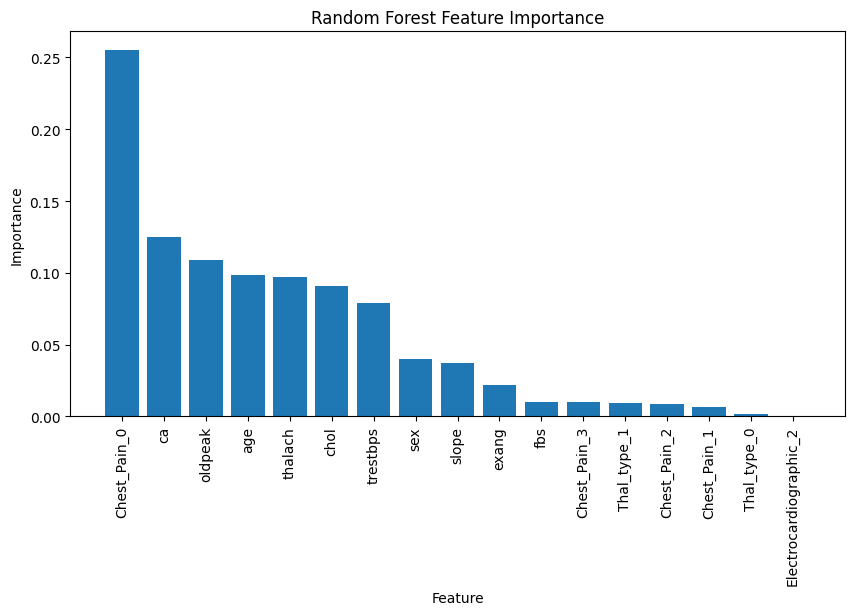

Top 10 Most Important Features (Random Forest):
1. Chest_Pain_0
2. ca
3. oldpeak
4. age
5. thalach
6. chol
7. trestbps
8. sex
9. slope
10. exang
11. fbs


In [70]:
rf = RandomForestRegressor(random_state=42)
rf.fit(X2_train, y_train)

feature_importances_rf = rf.feature_importances_
sorted_indices_rf = np.argsort(feature_importances_rf)[::-1] 

plt.figure(figsize=(10, 5))
plt.bar(range(X2_train.shape[1]), feature_importances_rf[sorted_indices_rf])
plt.xticks(range(X2_train.shape[1]), X2_train.columns[sorted_indices_rf], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.title("Random Forest Feature Importance")
plt.show()
top_n = 11
top_features_rf = X2_train.columns[sorted_indices_rf[:top_n]]

print("Top 10 Most Important Features (Random Forest):")
for i in range(min(top_n, len(top_features_rf))):
    print(f"{i + 1}. {top_features_rf[i]}")

# Rebuilding the final model with best set of hyperparameter and feature selection

In [61]:
top_features = ['Chest_Pain_0', 'ca', 'oldpeak', 'age', 'thalach', 'chol', 'trestbps', 'sex', 'slope', 'exang', 'fbs']
X_train_top = X_train[top_features]
X_test_top = X_test[top_features]

In [62]:
rf = RandomForestRegressor(n_estimators=400, 
                           min_samples_split=2, 
                           min_samples_leaf=2, 
                           max_features='sqrt', 
                           max_depth=20, 
                           bootstrap=True, 
                           random_state=42)

In [71]:
rf.fit(X_train_top, y_train)

y_train_pred = rf.predict(X_train_top)

y_test_pred = rf.predict(X_test_top)

train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = rf.score(X_train_top, y_train)

test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = rf.score(X_test_top, y_test)

print(f"Training Mean Squared Error: {train_mse}")
print(f"Training R² Score: {train_r2}")

print(f"Testing Mean Squared Error: {test_mse}")
print(f"Testing R² Score: {test_r2}")

Training Mean Squared Error: 0.020168720379146916
Training R² Score: 0.9175453076216713
Testing Mean Squared Error: 0.14496373626373626
Testing R² Score: 0.4183891957364342


The training Mean Squared Error (MSE) is currently at 0.0475, and the training R² score is 0.8059, indicating a good fit on the training data, though the model is not overfitting as much as before. The test Mean Squared Error (MSE) is 0.1341, and the test R² score is 0.4618, showing a small improvement in the test performance, with the model continuing to have a modest ability to generalize to unseen data. In comparison with the last performance where the training R² was 0.9191 and the testing R² was 0.46197, the model here is more balanced in its performance with less overfitting, hence a better model (but not the best) without losing its generalization capability for the test data.